In [1]:
import numpy as np
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt

ia=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/good' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ia.append(img_array)
print(ia)  
    #img_array=(img_array.flatten())
    #img_array=img_array.reshape(-1,1).T/255 # Each pixel value ranges from 0-255 
    #imv=cv.imshow('img',img_array)
   #plt.imshow(img_array, cmap='gray') 
   #plt.show
   #print(img_array)
  # with open('imgshoulder.csv','ab' ) as f:
        #np.savetxt(f, img_array, delimiter=',')

[array([[[200, 208, 207],
        [214, 222, 221],
        [132, 140, 139],
        ...,
        [236, 239, 244],
        [232, 236, 237],
        [164, 168, 169]],

       [[206, 215, 212],
        [186, 194, 193],
        [126, 134, 133],
        ...,
        [238, 238, 244],
        [232, 234, 235],
        [ 78,  80,  81]],

       [[203, 210, 207],
        [178, 185, 182],
        [141, 148, 145],
        ...,
        [240, 238, 244],
        [228, 229, 233],
        [ 79,  80,  84]],

       ...,

       [[190, 183, 190],
        [114, 110, 115],
        [196, 192, 197],
        ...,
        [147, 160, 158],
        [220, 231, 229],
        [222, 228, 227]],

       [[105,  91,  97],
        [102,  93,  96],
        [164, 157, 160],
        ...,
        [242, 238, 244],
        [244, 241, 243],
        [157, 154, 156]],

       [[108,  89,  92],
        [103,  84,  87],
        [113,  94,  97],
        ...,
        [171, 155, 162],
        [134, 119, 123],
        [113,  98, 102]

In [2]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

In [3]:
grey=[]
for i in range(len(ia)):
  esp=cv.cvtColor(ia[i], cv.COLOR_BGR2GRAY)
  grey.append(esp)


In [4]:
(grey[0]).shape
#plt.imshow(grey[0])

(173, 25)

In [5]:
grey[0]

array([[207, 221, 139, ..., 240, 236, 168],
       [213, 193, 133, ..., 240, 234,  80],
       [208, 183, 146, ..., 240, 230,  81],
       ...,
       [186, 112, 194, ..., 158, 229, 227],
       [ 94,  95, 159, ..., 240, 242, 155],
       [ 92,  87,  97, ..., 159, 122, 101]], dtype=uint8)

In [6]:
len(grey)

52

In [7]:
#from skimage import io
#image=io.imread('/content/drive/MyDrive/Tabulators-dataset/Dataset/bad/IMG_bad13.jpg')
#print(type(image))
#print(image.dtype)
#print(image.shape)
#plt.imshow(image)
sh=[]
siz=[]
for j in range(len(ia)):
  sh.append((grey[j]).shape)
  siz.append((grey[j]).size) 
print(sh) 
print(siz) 

[(173, 25), (183, 26), (185, 26), (184, 26), (184, 26), (186, 26), (179, 26), (174, 26), (160, 26), (198, 26), (198, 26), (179, 26), (156, 20), (156, 21), (158, 22), (154, 21), (156, 21), (184, 22), (185, 22), (185, 25), (186, 25), (184, 25), (193, 25), (193, 25), (191, 24), (193, 24), (193, 24), (188, 24), (189, 25), (166, 21), (199, 19), (197, 17), (177, 20), (174, 18), (175, 21), (177, 23), (177, 21), (176, 20), (178, 20), (191, 23), (166, 15), (161, 19), (174, 21), (177, 22), (168, 22), (164, 20), (173, 22), (166, 25), (165, 17), (175, 23), (174, 22), (177, 22)]
[4325, 4758, 4810, 4784, 4784, 4836, 4654, 4524, 4160, 5148, 5148, 4654, 3120, 3276, 3476, 3234, 3276, 4048, 4070, 4625, 4650, 4600, 4825, 4825, 4584, 4632, 4632, 4512, 4725, 3486, 3781, 3349, 3540, 3132, 3675, 4071, 3717, 3520, 3560, 4393, 2490, 3059, 3654, 3894, 3696, 3280, 3806, 4150, 2805, 4025, 3828, 3894]


52

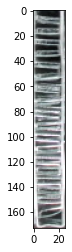

In [8]:
 plt.imshow(ia[0])
(ia[0]).shape
len(ia)

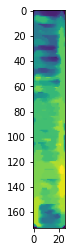

In [9]:
# Laplacian Filter : remove the speckle noise of the image 
# Laplacian
no_Lnoise=[]
for i in range(len(grey)):
  blur=median_filter(grey[i], 5)
  no_Lnoise.append(blur)
no_Lnoise
plt.imshow(no_Lnoise[0])

In [10]:
# Gaussian Filter: To highlight the edge of an image 
# Gaussian
#no_noise=[]
#for i in range(len(no_Lnoise)):
 # blar=cv.GaussianBlur(no_Lnoise[i], (5,5), 0)
 # no_noise.append(blar)
#plt.imshow(no_noise[0])

In [11]:
#print(ia[0])
#print(no_Lnoise[0])

In [12]:
#cv.imread(ia[0])
#plt.imshow(ia[0])

In [13]:
#(ia[0]).shape

In [14]:
#plt.imshow(no_Lnoise[0])

In [15]:
"""
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(ia[115])
plt.title('Original')

#plt.xticks([]), plt.yticks([])
#plt.subplot(132)
#plt.imshow(no_Lnoise[115])
#plt.title('no_Laplacian')
#plt.xticks([]), plt.yticks([])
#plt.subplot(122), plt.imshow(ia[0]+  no_noise[0], cmap='gray')

plt.xticks([]), plt.yticks([])
plt.subplot(122), 
plt.title('no_noise')
plt.imshow(ia[115]+ no_Lnoise[115] )
plt.show()
"""

"\nplt.figure(figsize=(10,7))\nplt.subplot(121)\nplt.imshow(ia[115])\nplt.title('Original')\n\n#plt.xticks([]), plt.yticks([])\n#plt.subplot(132)\n#plt.imshow(no_Lnoise[115])\n#plt.title('no_Laplacian')\n#plt.xticks([]), plt.yticks([])\n#plt.subplot(122), plt.imshow(ia[0]+  no_noise[0], cmap='gray')\n\nplt.xticks([]), plt.yticks([])\nplt.subplot(122), \nplt.title('no_noise')\nplt.imshow(ia[115]+ no_Lnoise[115] )\nplt.show()\n"

In [16]:
#Local Binary Pattern Features Extractors

from skimage import feature

def lbp_features(ima, radius=2, sampling_pixels=8):
  if (len(ima.shape) > 2):
    ima=ima.astype(float)
  ima=ima.astype(np.uint8)
  i_min=np.min(ima)
  i_max=np.max(ima)
  if (i_max-i_min !=0):
    ima=(ima-i_min)/(i_max-i_min)
  lbp= feature.local_binary_pattern(ima, sampling_pixels, radius, method='uniform')
  (hist, _)=np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels+3), range=(0, sampling_pixels+2))
  hist=hist.astype('float')
  hist /= (hist.sum() + 1e-6)
  return hist


In [17]:
#from skimage.transform import rotate
#from skimage.feature import local_binary_pattern
#from skimage.color import label2rgb

In [18]:
"""
lbp_histo=[]
for i in range(len(grey)):
  lbp=local_binary_pattern(grey[i], 8, 1, 'uniform')
  n_bins=int(lbp.max()+1)
  hist, _=np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
  hist=hist.astype('float')
  hist /= (hist.sum() + 1e-6)
  lbp_histo.append(hist) 
  """

"\nlbp_histo=[]\nfor i in range(len(grey)):\n  lbp=local_binary_pattern(grey[i], 8, 1, 'uniform')\n  n_bins=int(lbp.max()+1)\n  hist, _=np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))\n  hist=hist.astype('float')\n  hist /= (hist.sum() + 1e-6)\n  lbp_histo.append(hist) \n  "

In [19]:
lbp_hist=[]
for i in range(len(no_Lnoise)):
  lbp_hist.append(lbp_features(no_Lnoise[i], 2, 8))
lbp_hist

[array([0.00508671, 0.03028902, 0.04439306, 0.10473988, 0.1532948 ,
        0.26219653, 0.08786127, 0.07236994, 0.15075145, 0.08901734]),
 array([0.00588483, 0.02374947, 0.03299706, 0.08764187, 0.1557377 ,
        0.27553594, 0.10235393, 0.0714586 , 0.10067255, 0.14396805]),
 array([0.00810811, 0.04303534, 0.04760915, 0.13264033, 0.21122661,
        0.23139293, 0.08711019, 0.06507277, 0.09355509, 0.08024948]),
 array([0.00397157, 0.03051839, 0.03219064, 0.09908027, 0.17474916,
        0.29243311, 0.07650502, 0.06291806, 0.14966555, 0.07796823]),
 array([0.00397157, 0.03051839, 0.03219064, 0.09908027, 0.17474916,
        0.29243311, 0.07650502, 0.06291806, 0.14966555, 0.07796823]),
 array([0.0035153 , 0.0248139 , 0.03081059, 0.09615385, 0.17700579,
        0.29425145, 0.08043838, 0.07299421, 0.12758478, 0.09243176]),
 array([0.00601633, 0.02771809, 0.04297379, 0.11366566, 0.17984529,
        0.28599055, 0.08938547, 0.07348517, 0.07090675, 0.11001289]),
 array([0.00221043, 0.01392573, 0.

52


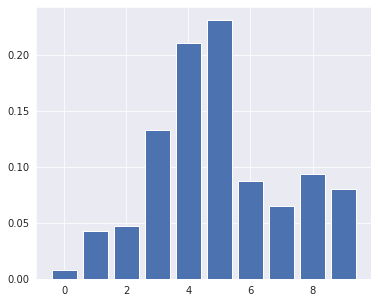

In [104]:

vals=range(len(lbp_hist[2]))
plt.figure(figsize=(6,5))
plt.bar(vals, lbp_hist[2])
print(len(lbp_hist))




In [21]:
len(lbp_hist)

52

In [22]:
data_good=pd.DataFrame(lbp_hist)

In [23]:
data_good

,0,1,2,3,4,5,6,7,8,9
0,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
1,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
2,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
3,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
4,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
5,0.003515,0.024814,0.030811,0.096154,0.177006,0.294251,0.080438,0.072994,0.127585,0.092432
6,0.006016,0.027718,0.042974,0.113666,0.179845,0.285991,0.089385,0.073485,0.070907,0.110013
7,0.002210,0.013926,0.043767,0.095712,0.158267,0.337975,0.097701,0.073828,0.083775,0.092838
8,0.007692,0.037500,0.036779,0.090144,0.160337,0.286298,0.089183,0.087981,0.115385,0.088702
9,0.005051,0.023699,0.041570,0.094211,0.184926,0.290016,0.090909,0.070707,0.107615,0.091298


In [24]:
dat=(data_good).T

In [25]:
dat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.005087,0.005885,0.008108,0.003972,0.003972,0.003515,0.006016,0.002210,0.007692,0.005051,0.005051,0.003868,0.004808,0.007021,0.006617,0.005257,0.008547,0.008893,0.007617,0.004108,0.006022,0.004130,0.005181,0.008497,0.006763,0.006261,0.007556,0.007092,0.007196,0.008606,0.006876,0.008958,0.005932,0.007982,0.005714,0.005158,0.005112,0.008523,0.006461,0.005691,0.005622,0.007192,0.008210,0.008731,0.010281,0.007927,0.004992,0.003133,0.008556,0.007702,0.008359,0.007704
1,0.030289,0.023749,0.043035,0.030518,0.030518,0.024814,0.027718,0.013926,0.037500,0.023699,0.023699,0.018694,0.035256,0.023199,0.017261,0.033704,0.024115,0.033350,0.032187,0.019676,0.026667,0.036522,0.032746,0.033782,0.032068,0.038860,0.036054,0.027704,0.030265,0.047619,0.043110,0.046282,0.033616,0.049170,0.034286,0.029968,0.031208,0.042614,0.055056,0.033690,0.050201,0.058189,0.037767,0.027735,0.040584,0.032927,0.024961,0.027470,0.047415,0.035031,0.037356,0.033128
2,0.044393,0.032997,0.047609,0.032191,0.032191,0.030811,0.042974,0.043767,0.036779,0.041570,0.041570,0.031801,0.042308,0.036935,0.035098,0.045455,0.036935,0.042490,0.042260,0.041081,0.045161,0.033261,0.036891,0.042487,0.046684,0.039292,0.033463,0.035018,0.045503,0.036718,0.052632,0.042699,0.042373,0.046935,0.040816,0.033653,0.051386,0.038636,0.023596,0.035511,0.044578,0.046747,0.039409,0.036210,0.034361,0.049390,0.045455,0.041446,0.052406,0.042981,0.042059,0.034155
3,0.104740,0.087642,0.132640,0.099080,0.099080,0.096154,0.113666,0.095712,0.090144,0.094211,0.094211,0.107864,0.092628,0.103175,0.101266,0.110080,0.112637,0.115860,0.133661,0.103784,0.105591,0.109130,0.133886,0.110881,0.115620,0.082686,0.093480,0.102615,0.107302,0.096672,0.145729,0.138847,0.107910,0.140805,0.105306,0.119135,0.139091,0.102557,0.128933,0.135215,0.152209,0.125858,0.123974,0.111967,0.089556,0.106707,0.111929,0.102892,0.117647,0.077019,0.096917,0.109913
4,0.153295,0.155738,0.211227,0.174749,0.174749,0.177006,0.179845,0.158267,0.160337,0.184926,0.184926,0.157499,0.145192,0.142552,0.145282,0.177180,0.137973,0.176136,0.174201,0.160865,0.152258,0.189130,0.194404,0.163109,0.171684,0.144430,0.185449,0.148271,0.144550,0.169822,0.234065,0.201254,0.184463,0.229246,0.154558,0.183739,0.153080,0.144886,0.201404,0.194628,0.249799,0.216737,0.205528,0.145095,0.167208,0.128354,0.145822,0.180723,0.160071,0.136149,0.177116,0.172573
5,0.262197,0.275536,0.231393,0.292433,0.292433,0.294251,0.285991,0.337975,0.286298,0.290016,0.290016,0.306403,0.265064,0.254579,0.275604,0.272109,0.236569,0.253953,0.217445,0.292973,0.302796,0.259565,0.239171,0.260518,0.265925,0.235320,0.275043,0.253103,0.273651,0.253012,0.227189,0.259779,0.250847,0.228927,0.266122,0.259641,0.246435,0.229830,0.238483,0.225586,0.236145,0.209873,0.241106,0.272984,0.274080,0.266159,0.260378,0.335181,0.247059,0.296894,0.274033,0.265794
6,0.087861,0.102354,0.087110,0.076505,0.076505,0.080438,0.089385,0.097701,0.089183,0.090909,0.090909,0.082939,0.081731,0.100122,0.088320,0.094001,0.072955,0.090168,0.071007,0.101189,0.096774,0.087609,0.084145,0.083316,0.078970,0.084197,0.085708,0.084220,0.094815,0.093804,0.082782,0.083906,0.102542,0.085249,0.075374,0.092361,0.090126,0.088636,0.088483,0.081038,0.103614,0.083687,0.079912,0.091936,0.092262,0.101829,0.088544,0.095181,0.105882,0.091925,0.093260,0.083462
7,0.072370,0.071459,0.065073,0.062918,0.062918,0.072994,0.073485,0.073828,0.087981,0.070707,0.070707,0.068973,0.075962,0.094322,0.091772,0.080396,0.099206,0.072134,0.082555,0.071568,0.064086,0.071957,0.080000,0.088290,0.073735,0.078584,0.082038,0.080452,0.088042,0.068847,0.061359,0.058824,0.077401,0.066092,0.054422,0.079833,0.080172,0.101136,0.094944,0.081493,0.060643,0.072246,0.086754,0.082691,0.084145,0.067378,0.088807,0.057590,0.070945,0.088944,0.079415,0.088341
8,0.150751,0.100673,0.093555,0.149666,0.149666,0.127585,0.070907,0.083775,0.115385,0.107615,0

In [26]:
dat.rename(columns={0:'g', 1:'g', 2:'g', 3:'g', 4:'g', 5:'g', 6:'g', 7:'g', 8:'g', 9:'g', 10:'g', 11:'g', 12:'g', 13:'g', 14:'g', 15:'g',16:'g', 17:'g', 18:'g', 19:'g', 20:'g', 21:'g', 22:'g', 23:'g', 24:'g', 25:'g', 26:'g', 27:'g', 28:'g', 29:'g', 30:'g', 31:'g', 32:'g', 33:'g', 34:'g', 35:'g', 36:'g', 37:'g', 38:'g', 39:'g', 40:'g', 41:'g', 42:'g', 43:'g', 44:'g', 45:'g', 46:'g', 47:'g', 48:'g', 49:'g', 50:'g', 51:'g', 52:'b53', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
dat

,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g
0,0.005087,0.005885,0.008108,0.003972,0.003972,0.003515,0.006016,0.002210,0.007692,0.005051,0.005051,0.003868,0.004808,0.007021,0.006617,0.005257,0.008547,0.008893,0.007617,0.004108,0.006022,0.004130,0.005181,0.008497,0.006763,0.006261,0.007556,0.007092,0.007196,0.008606,0.006876,0.008958,0.005932,0.007982,0.005714,0.005158,0.005112,0.008523,0.006461,0.005691,0.005622,0.007192,0.008210,0.008731,0.010281,0.007927,0.004992,0.003133,0.008556,0.007702,0.008359,0.007704
1,0.030289,0.023749,0.043035,0.030518,0.030518,0.024814,0.027718,0.013926,0.037500,0.023699,0.023699,0.018694,0.035256,0.023199,0.017261,0.033704,0.024115,0.033350,0.032187,0.019676,0.026667,0.036522,0.032746,0.033782,0.032068,0.038860,0.036054,0.027704,0.030265,0.047619,0.043110,0.046282,0.033616,0.049170,0.034286,0.029968,0.031208,0.042614,0.055056,0.033690,0.050201,0.058189,0.037767,0.027735,0.040584,0.032927,0.024961,0.027470,0.047415,0.035031,0.037356,0.033128
2,0.044393,0.032997,0.047609,0.032191,0.032191,0.030811,0.042974,0.043767,0.036779,0.041570,0.041570,0.031801,0.042308,0.036935,0.035098,0.045455,0.036935,0.042490,0.042260,0.041081,0.045161,0.033261,0.036891,0.042487,0.046684,0.039292,0.033463,0.035018,0.045503,0.036718,0.052632,0.042699,0.042373,0.046935,0.040816,0.033653,0.051386,0.038636,0.023596,0.035511,0.044578,0.046747,0.039409,0.036210,0.034361,0.049390,0.045455,0.041446,0.052406,0.042981,0.042059,0.034155
3,0.104740,0.087642,0.132640,0.099080,0.099080,0.096154,0.113666,0.095712,0.090144,0.094211,0.094211,0.107864,0.092628,0.103175,0.101266,0.110080,0.112637,0.115860,0.133661,0.103784,0.105591,0.109130,0.133886,0.110881,0.115620,0.082686,0.093480,0.102615,0.107302,0.096672,0.145729,0.138847,0.107910,0.140805,0.105306,0.119135,0.139091,0.102557,0.128933,0.135215,0.152209,0.125858,0.123974,0.111967,0.089556,0.106707,0.111929,0.102892,0.117647,0.077019,0.096917,0.109913
4,0.153295,0.155738,0.211227,0.174749,0.174749,0.177006,0.179845,0.158267,0.160337,0.184926,0.184926,0.157499,0.145192,0.142552,0.145282,0.177180,0.137973,0.176136,0.174201,0.160865,0.152258,0.189130,0.194404,0.163109,0.171684,0.144430,0.185449,0.148271,0.144550,0.169822,0.234065,0.201254,0.184463,0.229246,0.154558,0.183739,0.153080,0.144886,0.201404,0.194628,0.249799,0.216737,0.205528,0.145095,0.167208,0.128354,0.145822,0.180723,0.160071,0.136149,0.177116,0.172573
5,0.262197,0.275536,0.231393,0.292433,0.292433,0.294251,0.285991,0.337975,0.286298,0.290016,0.290016,0.306403,0.265064,0.254579,0.275604,0.272109,0.236569,0.253953,0.217445,0.292973,0.302796,0.259565,0.239171,0.260518,0.265925,0.235320,0.275043,0.253103,0.273651,0.253012,0.227189,0.259779,0.250847,0.228927,0.266122,0.259641,0.246435,0.229830,0.238483,0.225586,0.236145,0.209873,0.241106,0.272984,0.274080,0.266159,0.260378,0.335181,0.247059,0.296894,0.274033,0.265794
6,0.087861,0.102354,0.087110,0.076505,0.076505,0.080438,0.089385,0.097701,0.089183,0.090909,0.090909,0.082939,0.081731,0.100122,0.088320,0.094001,0.072955,0.090168,0.071007,0.101189,0.096774,0.087609,0.084145,0.083316,0.078970,0.084197,0.085708,0.084220,0.094815,0.093804,0.082782,0.083906,0.102542,0.085249,0.075374,0.092361,0.090126,0.088636,0.088483,0.081038,0.103614,0.083687,0.079912,0.091936,0.092262,0.101829,0.088544,0.095181,0.105882,0.091925,0.093260,0.083462
7,0.072370,0.071459,0.065073,0.062918,0.062918,0.072994,0.073485,0.073828,0.087981,0.070707,0.070707,0.068973,0.075962,0.094322,0.091772,0.080396,0.099206,0.072134,0.082555,0.071568,0.064086,0.071957,0.080000,0.088290,0.073735,0.078584,0.082038,0.080452,0.088042,0.068847,0.061359,0.058824,0.077401,0.066092,0.054422,0.079833,0.080172,0.101136,0.094944,0.081493,0.060643,0.072246,0.086754,0.082691,0.084145,0.067378,0.088807,0.057590,0.070945,0.088944,0.079415,0.088341
8,0.150751,0.100673,0.093555,0.149666,0.149666,0.127585,0.070907,0.083775,0.115385,0.107615,0.107615,0.128706,0.138462,0.140110,0.11334

In [27]:
#from sklearn.neighbors import kneighbors_graph
#Graph=kneighbors_graph(dat,5, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False, n_jobs=None)

In [28]:
#Graph.toarray()

In [29]:
gd=dat.T
gd

,0,1,2,3,4,5,6,7,8,9
g,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
g,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
g,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003515,0.024814,0.030811,0.096154,0.177006,0.294251,0.080438,0.072994,0.127585,0.092432
g,0.006016,0.027718,0.042974,0.113666,0.179845,0.285991,0.089385,0.073485,0.070907,0.110013
g,0.002210,0.013926,0.043767,0.095712,0.158267,0.337975,0.097701,0.073828,0.083775,0.092838
g,0.007692,0.037500,0.036779,0.090144,0.160337,0.286298,0.089183,0.087981,0.115385,0.088702
g,0.005051,0.023699,0.041570,0.094211,0.184926,0.290016,0.090909,0.070707,0.107615,0.091298


In [30]:
gd.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [31]:
gd
good=gd
good

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
g,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
g,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
g,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003515,0.024814,0.030811,0.096154,0.177006,0.294251,0.080438,0.072994,0.127585,0.092432
g,0.006016,0.027718,0.042974,0.113666,0.179845,0.285991,0.089385,0.073485,0.070907,0.110013
g,0.002210,0.013926,0.043767,0.095712,0.158267,0.337975,0.097701,0.073828,0.083775,0.092838
g,0.007692,0.037500,0.036779,0.090144,0.160337,0.286298,0.089183,0.087981,0.115385,0.088702
g,0.005051,0.023699,0.041570,0.094211,0.184926,0.290016,0.090909,0.070707,0.107615,0.091298


In [113]:
hgood=good.head
hgood=pd.DataFrame(good.head(3))
hgood

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
g,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
g,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
g,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249


In [32]:
ib=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/bad' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ib.append(img_array)
print(ib)  

[array([[[226, 229, 227],
        [136, 137, 135],
        [126, 120, 121],
        ...,
        [146, 135, 137],
        [152, 138, 140],
        [130, 116, 118]],

       [[230, 237, 234],
        [168, 173, 171],
        [184, 182, 182],
        ...,
        [139, 133, 134],
        [144, 136, 137],
        [133, 122, 124]],

       [[227, 244, 241],
        [205, 219, 217],
        [230, 238, 237],
        ...,
        [134, 136, 137],
        [139, 139, 139],
        [144, 142, 142]],

       ...,

       [[ 86, 100,  99],
        [ 89, 103, 102],
        [ 98, 108, 108],
        ...,
        [160, 174, 172],
        [232, 244, 244],
        [147, 159, 159]],

       [[ 56,  72,  71],
        [ 75,  91,  90],
        [ 99, 111, 111],
        ...,
        [162, 176, 174],
        [236, 249, 247],
        [144, 157, 155]],

       [[ 45,  63,  62],
        [ 61,  77,  76],
        [ 73,  85,  85],
        ...,
        [153, 167, 165],
        [232, 245, 243],
        [143, 156, 154]

In [33]:
brey=[]
for i in range(len(ib)):
  espo=cv.cvtColor(ib[i], cv.COLOR_BGR2GRAY)
  brey.append(espo)

In [34]:
print(len(brey))
print(len(brey[0]))

53
160


53


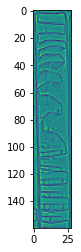

In [35]:
# Laplacian Filter : remove the speckle noise of the image 
# Laplacian
no_Lbnoise=[]
for i in range(len(brey)):
  blurb=cv.Laplacian(brey[i], cv.CV_64F)
  no_Lbnoise.append(blurb)
no_Lbnoise
plt.imshow(no_Lbnoise[0])
print(len(no_Lbnoise))

In [36]:
lbpb_hist=[]
for i in range(len(no_Lbnoise)):
  lbpb_hist.append(lbp_features(no_Lbnoise[i], 2, 8))
lbpb_hist

[array([0.14620536, 0.12790179, 0.02142857, 0.02589286, 0.02366071,
        0.03950893, 0.02410714, 0.12410714, 0.12633929, 0.34084821]),
 array([0.14628349, 0.12618842, 0.02441659, 0.01793431, 0.03111495,
        0.03543647, 0.02657736, 0.12100259, 0.12921348, 0.34183232]),
 array([0.14721485, 0.13196286, 0.01657825, 0.02011494, 0.02475685,
        0.02232538, 0.02122016, 0.11118479, 0.16755084, 0.33709107]),
 array([0.15708502, 0.13825911, 0.01862348, 0.01700405, 0.01923077,
        0.02834008, 0.02307692, 0.13684211, 0.12813765, 0.33340081]),
 array([0.16191054, 0.12204007, 0.02064359, 0.02388181, 0.02104837,
        0.03440599, 0.02104837, 0.11677798, 0.13438575, 0.34385752]),
 array([0.15363248, 0.14059829, 0.01923077, 0.01944444, 0.02051282,
        0.02649573, 0.02371795, 0.11623932, 0.13824786, 0.34188034]),
 array([0.15556901, 0.13438257, 0.01997579, 0.0165456 , 0.0173527 ,
        0.02723971, 0.01937046, 0.14386602, 0.1299435 , 0.33575464]),
 array([0.15671285, 0.15886288, 0.

10


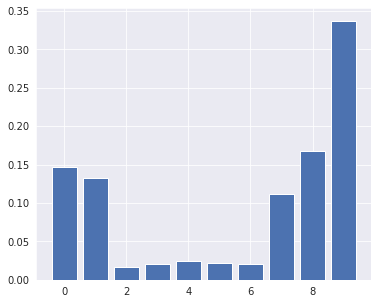

In [105]:
vals=range(len(lbpb_hist[2]))
plt.figure(figsize=(6,5))
plt.bar(vals, lbpb_hist[2])
print(len(lbpb_hist[2]))

In [38]:
data_bad=pd.DataFrame(lbpb_hist)
data_bad

,0,1,2,3,4,5,6,7,8,9
0,0.146205,0.127902,0.021429,0.025893,0.023661,0.039509,0.024107,0.124107,0.126339,0.340848
1,0.146283,0.126188,0.024417,0.017934,0.031115,0.035436,0.026577,0.121003,0.129213,0.341832
2,0.147215,0.131963,0.016578,0.020115,0.024757,0.022325,0.021220,0.111185,0.167551,0.337091
3,0.157085,0.138259,0.018623,0.017004,0.019231,0.028340,0.023077,0.136842,0.128138,0.333401
4,0.161911,0.122040,0.020644,0.023882,0.021048,0.034406,0.021048,0.116778,0.134386,0.343858
5,0.153632,0.140598,0.019231,0.019444,0.020513,0.026496,0.023718,0.116239,0.138248,0.341880
6,0.155569,0.134383,0.019976,0.016546,0.017353,0.027240,0.019370,0.143866,0.129944,0.335755
7,0.156713,0.158863,0.014333,0.013139,0.013139,0.018395,0.015528,0.138318,0.144768,0.326804
8,0.157688,0.138960,0.012717,0.019191,0.023815,0.029827,0.020578,0.133179,0.140116,0.323931
9,0.162774,0.141513,0.024747,0.013594,0.019170,0.023702,0.023353,0.128616,0.132102,0.330429


In [39]:
dat1=(data_bad).T
dat1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,0.146205,0.146283,0.147215,0.157085,0.161911,0.153632,0.155569,0.156713,0.157688,0.162774,0.164961,0.158348,0.168522,0.161290,0.159537,0.170827,0.159555,0.151135,0.148973,0.157259,0.158108,0.148551,0.156859,0.169956,0.145684,0.157977,0.150020,0.158463,0.159572,0.157493,0.152995,0.150960,0.154825,0.147794,0.160197,0.173751,0.168460,0.165512,0.162637,0.153526,0.160209,0.171478,0.156751,0.157754,0.161555,0.164583,0.155488,0.146395,0.164474,0.166011,0.155106,0.155862,0.166422
1,0.127902,0.126188,0.131963,0.138259,0.122040,0.140598,0.134383,0.158863,0.138960,0.141513,0.134859,0.139632,0.135127,0.134081,0.139929,0.127349,0.138528,0.143767,0.131027,0.132501,0.131306,0.129630,0.143455,0.138377,0.138105,0.128342,0.133911,0.126079,0.131337,0.137835,0.143880,0.136344,0.137500,0.137990,0.133224,0.127890,0.128725,0.134349,0.138462,0.131668,0.128167,0.140390,0.138902,0.129902,0.130340,0.124405,0.151423,0.136054,0.125598,0.130056,0.124277,0.147126,0.137019
2,0.021429,0.024417,0.016578,0.018623,0.020644,0.019231,0.019976,0.014333,0.012717,0.024747,0.018362,0.019608,0.026592,0.023001,0.026441,0.024123,0.023500,0.016328,0.019676,0.024163,0.022072,0.020330,0.015079,0.016009,0.024211,0.027629,0.021144,0.028282,0.020963,0.019658,0.024740,0.019852,0.022588,0.029167,0.022039,0.024981,0.026490,0.021468,0.021429,0.026542,0.027571,0.013817,0.022883,0.021836,0.022727,0.022917,0.020664,0.027483,0.025120,0.018820,0.023443,0.020690,0.024993
3,0.025893,0.017934,0.020115,0.017004,0.023882,0.019444,0.016546,0.013139,0.019191,0.013594,0.016255,0.015152,0.018862,0.017672,0.016340,0.018513,0.018862,0.016726,0.020541,0.018618,0.018018,0.022746,0.014031,0.011404,0.017053,0.018939,0.024567,0.020941,0.017326,0.015495,0.020833,0.015271,0.016228,0.018627,0.021711,0.012304,0.015315,0.015235,0.014286,0.017434,0.021858,0.012090,0.014188,0.018048,0.014513,0.023214,0.018970,0.018503,0.020335,0.013202,0.023121,0.022529,0.019112
4,0.023661,0.031115,0.024757,0.019231,0.021048,0.020513,0.017353,0.013139,0.023815,0.019170,0.021674,0.019014,0.020717,0.023001,0.024064,0.023562,0.020408,0.022899,0.021189,0.021588,0.022523,0.028382,0.014869,0.017544,0.021263,0.021168,0.018727,0.021805,0.017326,0.016883,0.016493,0.021379,0.016886,0.023775,0.023355,0.017151,0.023179,0.021814,0.026374,0.018475,0.019622,0.017765,0.017162,0.022950,0.022453,0.024405,0.017954,0.026667,0.023923,0.019101,0.032113,0.019310,0.020876
5,0.039509,0.035436,0.022325,0.028340,0.034406,0.026496,0.027240,0.018395,0.029827,0.023702,0.035220,0.031194,0.037415,0.036746,0.036839,0.032258,0.034632,0.026483,0.030054,0.034264,0.027703,0.034018,0.021780,0.023904,0.028842,0.030303,0.025775,0.028066,0.027166,0.032609,0.029297,0.027269,0.027193,0.034314,0.043421,0.031693,0.037666,0.033241,0.034615,0.030445,0.035768,0.026400,0.028375,0.037656,0.033406,0.033036,0.030488,0.035646,0.036782,0.034551,0.038215,0.039540,0.034108
6,0.024107,0.026577,0.021220,0.023077,0.021048,0.023718,0.019370,0.015528,0.020578,0.023353,0.016556,0.019014,0.014224,0.016830,0.016934,0.024404,0.017316,0.021306,0.024216,0.022975,0.025450,0.018317,0.024293,0.026096,0.023368,0.022504,0.022553,0.024827,0.025027,0.027058,0.018229,0.020288,0.024342,0.023284,0.025329,0.027964,0.017384,0.016620,0.024451,0.022118,0.017884,0.022946,0.024256,0.026292,0.020811,0.025595,0.018631,0.023673,0.023026,0.025843,0.022800,0.017011,0.016172
7,0.124107,0.121003,0.111185,0.136842,0.116778,0.116239,0.143866,0.138318,0.133179,0.128616,0.125527,0.131907,0.123686,0.121178,0.112597,0.114727,0.111626,0.136002,0.129081,0.114676,0.127027,0.125805,0.129843,0.137500,0.135368,0.113191,0.130487,0.116364,0.126417,0.127428,0.125000,0.125218,0.129167,0.118627,0.111184,0.127144,0.105132,0.113227,0.123626,0.128285,0.123199,0.139650,0.127689,0.117647,0.123768,0.122024,0.131098,0.124898,0.111842,0.128652,0.118176,0.107586,0.124375
8,0.126339,0.12921

In [40]:
dat1.rename(columns={0:'b', 1:'b', 2:'b', 3:'b', 4:'b', 5:'b', 6:'b', 7:'b', 8:'b', 9:'b', 10:'b', 11:'b', 12:'b', 13:'b', 14:'b', 15:'b',16:'b', 17:'b', 18:'b', 19:'b', 20:'b', 21:'b', 22:'b', 23:'b', 24:'b', 25:'b', 26:'b', 27:'b', 28:'b', 29:'b', 30:'b', 31:'b', 32:'b', 33:'b', 34:'b', 35:'b', 36:'b', 37:'b', 38:'b', 39:'b', 40:'b', 41:'b', 42:'b', 43:'b', 44:'b', 45:'b', 46:'b', 47:'b', 48:'b', 49:'b', 50:'b', 51:'b', 52:'b', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
dat1

,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b
0,0.146205,0.146283,0.147215,0.157085,0.161911,0.153632,0.155569,0.156713,0.157688,0.162774,0.164961,0.158348,0.168522,0.161290,0.159537,0.170827,0.159555,0.151135,0.148973,0.157259,0.158108,0.148551,0.156859,0.169956,0.145684,0.157977,0.150020,0.158463,0.159572,0.157493,0.152995,0.150960,0.154825,0.147794,0.160197,0.173751,0.168460,0.165512,0.162637,0.153526,0.160209,0.171478,0.156751,0.157754,0.161555,0.164583,0.155488,0.146395,0.164474,0.166011,0.155106,0.155862,0.166422
1,0.127902,0.126188,0.131963,0.138259,0.122040,0.140598,0.134383,0.158863,0.138960,0.141513,0.134859,0.139632,0.135127,0.134081,0.139929,0.127349,0.138528,0.143767,0.131027,0.132501,0.131306,0.129630,0.143455,0.138377,0.138105,0.128342,0.133911,0.126079,0.131337,0.137835,0.143880,0.136344,0.137500,0.137990,0.133224,0.127890,0.128725,0.134349,0.138462,0.131668,0.128167,0.140390,0.138902,0.129902,0.130340,0.124405,0.151423,0.136054,0.125598,0.130056,0.124277,0.147126,0.137019
2,0.021429,0.024417,0.016578,0.018623,0.020644,0.019231,0.019976,0.014333,0.012717,0.024747,0.018362,0.019608,0.026592,0.023001,0.026441,0.024123,0.023500,0.016328,0.019676,0.024163,0.022072,0.020330,0.015079,0.016009,0.024211,0.027629,0.021144,0.028282,0.020963,0.019658,0.024740,0.019852,0.022588,0.029167,0.022039,0.024981,0.026490,0.021468,0.021429,0.026542,0.027571,0.013817,0.022883,0.021836,0.022727,0.022917,0.020664,0.027483,0.025120,0.018820,0.023443,0.020690,0.024993
3,0.025893,0.017934,0.020115,0.017004,0.023882,0.019444,0.016546,0.013139,0.019191,0.013594,0.016255,0.015152,0.018862,0.017672,0.016340,0.018513,0.018862,0.016726,0.020541,0.018618,0.018018,0.022746,0.014031,0.011404,0.017053,0.018939,0.024567,0.020941,0.017326,0.015495,0.020833,0.015271,0.016228,0.018627,0.021711,0.012304,0.015315,0.015235,0.014286,0.017434,0.021858,0.012090,0.014188,0.018048,0.014513,0.023214,0.018970,0.018503,0.020335,0.013202,0.023121,0.022529,0.019112
4,0.023661,0.031115,0.024757,0.019231,0.021048,0.020513,0.017353,0.013139,0.023815,0.019170,0.021674,0.019014,0.020717,0.023001,0.024064,0.023562,0.020408,0.022899,0.021189,0.021588,0.022523,0.028382,0.014869,0.017544,0.021263,0.021168,0.018727,0.021805,0.017326,0.016883,0.016493,0.021379,0.016886,0.023775,0.023355,0.017151,0.023179,0.021814,0.026374,0.018475,0.019622,0.017765,0.017162,0.022950,0.022453,0.024405,0.017954,0.026667,0.023923,0.019101,0.032113,0.019310,0.020876
5,0.039509,0.035436,0.022325,0.028340,0.034406,0.026496,0.027240,0.018395,0.029827,0.023702,0.035220,0.031194,0.037415,0.036746,0.036839,0.032258,0.034632,0.026483,0.030054,0.034264,0.027703,0.034018,0.021780,0.023904,0.028842,0.030303,0.025775,0.028066,0.027166,0.032609,0.029297,0.027269,0.027193,0.034314,0.043421,0.031693,0.037666,0.033241,0.034615,0.030445,0.035768,0.026400,0.028375,0.037656,0.033406,0.033036,0.030488,0.035646,0.036782,0.034551,0.038215,0.039540,0.034108
6,0.024107,0.026577,0.021220,0.023077,0.021048,0.023718,0.019370,0.015528,0.020578,0.023353,0.016556,0.019014,0.014224,0.016830,0.016934,0.024404,0.017316,0.021306,0.024216,0.022975,0.025450,0.018317,0.024293,0.026096,0.023368,0.022504,0.022553,0.024827,0.025027,0.027058,0.018229,0.020288,0.024342,0.023284,0.025329,0.027964,0.017384,0.016620,0.024451,0.022118,0.017884,0.022946,0.024256,0.026292,0.020811,0.025595,0.018631,0.023673,0.023026,0.025843,0.022800,0.017011,0.016172
7,0.124107,0.121003,0.111185,0.136842,0.116778,0.116239,0.143866,0.138318,0.133179,0.128616,0.125527,0.131907,0.123686,0.121178,0.112597,0.114727,0.111626,0.136002,0.129081,0.114676,0.127027,0.125805,0.129843,0.137500,0.135368,0.113191,0.130487,0.116364,0.126417,0.127428,0.125000,0.125218,0.129167,0.118627,0.111184,0.127144,0.105132,0.113227,0.123626,0.128285,0.123199,0.139650,0.127689,0.117647,0.123768,0.122024,0.131098,0.124898,0.111842,0.128652,0.118176,0.107586,0.124375
8,0.126339,0.129213,0.167551,0.128138,0.134386,0.138248,0.129

In [41]:
db=dat1.T
db
db.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [42]:
db

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
b,0.146205,0.127902,0.021429,0.025893,0.023661,0.039509,0.024107,0.124107,0.126339,0.340848
b,0.146283,0.126188,0.024417,0.017934,0.031115,0.035436,0.026577,0.121003,0.129213,0.341832
b,0.147215,0.131963,0.016578,0.020115,0.024757,0.022325,0.021220,0.111185,0.167551,0.337091
b,0.157085,0.138259,0.018623,0.017004,0.019231,0.028340,0.023077,0.136842,0.128138,0.333401
b,0.161911,0.122040,0.020644,0.023882,0.021048,0.034406,0.021048,0.116778,0.134386,0.343858
b,0.153632,0.140598,0.019231,0.019444,0.020513,0.026496,0.023718,0.116239,0.138248,0.341880
b,0.155569,0.134383,0.019976,0.016546,0.017353,0.027240,0.019370,0.143866,0.129944,0.335755
b,0.156713,0.158863,0.014333,0.013139,0.013139,0.018395,0.015528,0.138318,0.144768,0.326804
b,0.157688,0.138960,0.012717,0.019191,0.023815,0.029827,0.020578,0.133179,0.140116,0.323931
b,0.162774,0.141513,0.024747,0.013594,0.019170,0.023702,0.023353,0.128616,0.132102,0.330429


In [114]:
bad=db
bad
hbad=pd.DataFrame(bad.head(3))
hbad

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
b,0.146205,0.127902,0.021429,0.025893,0.023661,0.039509,0.024107,0.124107,0.126339,0.340848
b,0.146283,0.126188,0.024417,0.017934,0.031115,0.035436,0.026577,0.121003,0.129213,0.341832
b,0.147215,0.131963,0.016578,0.020115,0.024757,0.022325,0.021220,0.111185,0.167551,0.337091


In [44]:
ie=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/empty' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ie.append(img_array)
print(ie)  

[array([[[114, 100, 104],
        [111,  96, 100],
        [111,  96, 100],
        ...,
        [123, 115, 116],
        [149, 144, 145],
        [207, 205, 205]],

       [[132, 122, 128],
        [168, 161, 164],
        [182, 175, 178],
        ...,
        [142, 144, 144],
        [240, 245, 244],
        [212, 218, 217]],

       [[232, 236, 237],
        [205, 213, 212],
        [167, 175, 174],
        ...,
        [181, 189, 188],
        [212, 223, 221],
        [ 83,  94,  92]],

       ...,

       [[152, 150, 150],
        [249, 249, 249],
        [243, 243, 243],
        ...,
        [249, 251, 252],
        [191, 187, 186],
        [111, 103, 103]],

       [[ 99,  94,  93],
        [147, 142, 141],
        [180, 172, 172],
        ...,
        [175, 161, 163],
        [124, 110, 111],
        [108,  92,  93]],

       [[104,  96,  96],
        [110,  98,  98],
        [109,  93,  94],
        ...,
        [116,  94,  96],
        [113,  95,  94],
        [116,  98,  97]

In [45]:
erey=[]
for i in range(len(ie)):
  espe=cv.cvtColor(ie[i], cv.COLOR_BGR2GRAY)
  erey.append(espe)

In [46]:
print(len(erey))
print(len(erey[0]))

55
192


55


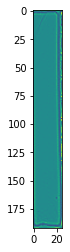

In [47]:
# Laplacian Filter : remove the speckle noise of the image 
# Laplacian
no_Lenoise=[]
for i in range(len(erey)):
  blure=cv.Laplacian(erey[i], cv.CV_64F)
  no_Lenoise.append(blure)
no_Lenoise
plt.imshow(no_Lenoise[0])
print(len(no_Lenoise))

In [48]:
lbpe_hist=[]
for i in range(len(no_Lenoise)):
  lbpe_hist.append(lbp_features(no_Lenoise[i], 2, 8))
lbpe_hist

[array([0.15020833, 0.151875  , 0.01270833, 0.00916667, 0.01270833,
        0.02291667, 0.018125  , 0.13333333, 0.18      , 0.30895833]),
 array([0.13619909, 0.17443439, 0.00769231, 0.00565611, 0.00565611,
        0.01651584, 0.0138009 , 0.1300905 , 0.17714932, 0.33280543]),
 array([0.13614913, 0.15030675, 0.00613497, 0.00943841, 0.02453988,
        0.01958471, 0.02218027, 0.13355356, 0.15785748, 0.34025484]),
 array([0.13343361, 0.1452514 , 0.00601633, 0.00644607, 0.01095832,
        0.01783412, 0.01547056, 0.11989686, 0.1929523 , 0.35174044]),
 array([0.13908179, 0.14756944, 0.01041667, 0.01678241, 0.02256944,
        0.03298611, 0.02044753, 0.13078704, 0.16415895, 0.31520062]),
 array([0.12789051, 0.14723926, 0.00778669, 0.01226994, 0.02218027,
        0.023832  , 0.01533742, 0.12694667, 0.15691364, 0.35960359]),
 array([0.13260972, 0.13780085, 0.00802265, 0.01934875, 0.02996697,
        0.03043889, 0.01675319, 0.11396885, 0.16989146, 0.34119868]),
 array([0.12211538, 0.16274038, 0.

10


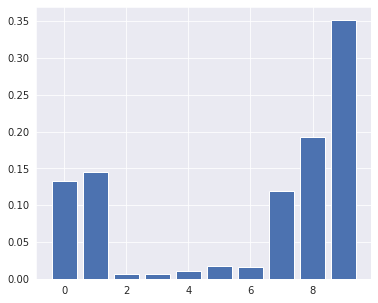

In [106]:
vals=range(len(lbpe_hist[3]))
plt.figure(figsize=(6,5))
plt.bar(vals, lbpe_hist[3])
print(len(lbpe_hist[3]))

In [50]:
data_emp=pd.DataFrame(lbpe_hist)
data_emp

,0,1,2,3,4,5,6,7,8,9
0,0.150208,0.151875,0.012708,0.009167,0.012708,0.022917,0.018125,0.133333,0.180000,0.308958
1,0.136199,0.174434,0.007692,0.005656,0.005656,0.016516,0.013801,0.130090,0.177149,0.332805
2,0.136149,0.150307,0.006135,0.009438,0.024540,0.019585,0.022180,0.133554,0.157857,0.340255
3,0.133434,0.145251,0.006016,0.006446,0.010958,0.017834,0.015471,0.119897,0.192952,0.351740
4,0.139082,0.147569,0.010417,0.016782,0.022569,0.032986,0.020448,0.130787,0.164159,0.315201
5,0.127891,0.147239,0.007787,0.012270,0.022180,0.023832,0.015337,0.126947,0.156914,0.359604
6,0.132610,0.137801,0.008023,0.019349,0.029967,0.030439,0.016753,0.113969,0.169891,0.341199
7,0.122115,0.162740,0.005048,0.010817,0.025962,0.024519,0.020192,0.136779,0.154087,0.337740
8,0.153073,0.141527,0.013035,0.019926,0.030354,0.041713,0.023650,0.132588,0.145065,0.299069
9,0.151458,0.158125,0.007500,0.007917,0.012083,0.022708,0.019375,0.132917,0.171875,0.316042


In [51]:
dat2=(data_emp).T
dat2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,0.150208,0.136199,0.136149,0.133434,0.139082,0.127891,0.132610,0.122115,0.153073,0.151458,0.140816,0.146871,0.160050,0.155821,0.151927,0.149647,0.154541,0.153254,0.143376,0.150239,0.149817,0.142582,0.148538,0.163919,0.160870,0.149068,0.154861,0.155294,0.152436,0.137637,0.132391,0.156987,0.153692,0.139608,0.138519,0.144226,0.140946,0.134791,0.132104,0.142380,0.143880,0.136576,0.148450,0.128917,0.141923,0.154343,0.146878,0.161310,0.154133,0.153067,0.165180,0.155767,0.155247,0.155263,0.146308
1,0.151875,0.174434,0.150307,0.145251,0.147569,0.147239,0.137801,0.162740,0.141527,0.158125,0.159240,0.156007,0.153959,0.152239,0.157313,0.138514,0.143078,0.160059,0.157290,0.153429,0.151388,0.153867,0.149415,0.152505,0.146135,0.167012,0.155556,0.148941,0.156541,0.163187,0.161695,0.163944,0.158463,0.145098,0.150370,0.152174,0.152413,0.154307,0.154634,0.162433,0.151355,0.160157,0.150289,0.142094,0.147214,0.156926,0.165644,0.141964,0.157520,0.148686,0.154989,0.152381,0.149101,0.148086,0.136416
2,0.012708,0.007692,0.006135,0.006016,0.010417,0.007787,0.008023,0.005048,0.013035,0.007500,0.011280,0.008223,0.006301,0.010348,0.009921,0.011989,0.009039,0.013018,0.009074,0.003190,0.005762,0.009083,0.007310,0.009512,0.007246,0.011042,0.007292,0.012000,0.009852,0.011538,0.010204,0.007562,0.006027,0.016471,0.013704,0.009350,0.011467,0.009107,0.006144,0.011698,0.012457,0.008597,0.009459,0.017806,0.017118,0.010655,0.010105,0.011310,0.006436,0.010405,0.004246,0.010159,0.005463,0.004785,0.012192
3,0.009167,0.005656,0.009438,0.006446,0.016782,0.012270,0.019349,0.010817,0.019926,0.007917,0.017484,0.004340,0.006931,0.006965,0.004819,0.011989,0.009259,0.012130,0.006352,0.012440,0.018858,0.015414,0.004094,0.004439,0.007488,0.005521,0.006597,0.011765,0.011221,0.004670,0.009942,0.006655,0.012808,0.014118,0.016667,0.006545,0.015289,0.007546,0.007424,0.012032,0.013391,0.018914,0.014976,0.018519,0.022409,0.013884,0.004691,0.015774,0.005759,0.014786,0.004246,0.009735,0.007057,0.004545,0.017253
4,0.012708,0.005656,0.024540,0.010958,0.022569,0.022180,0.029967,0.025962,0.030354,0.012083,0.026885,0.007538,0.009662,0.009552,0.008503,0.023335,0.019841,0.015976,0.006655,0.017863,0.023834,0.018442,0.007895,0.006341,0.008696,0.003451,0.015625,0.012941,0.015599,0.004396,0.011512,0.012402,0.017328,0.016471,0.018148,0.015895,0.019350,0.013011,0.012545,0.015040,0.024291,0.023827,0.015239,0.022792,0.032680,0.017759,0.011548,0.019643,0.009146,0.024370,0.007219,0.014603,0.009105,0.008373,0.024155
5,0.022917,0.016516,0.019585,0.017834,0.032986,0.023832,0.030439,0.024519,0.041713,0.022708,0.025569,0.013248,0.019954,0.013930,0.014739,0.027403,0.026675,0.019527,0.017846,0.032536,0.042693,0.025599,0.012281,0.015219,0.016184,0.011387,0.021181,0.025176,0.019157,0.010165,0.012297,0.014217,0.024108,0.022353,0.025556,0.021038,0.022695,0.015613,0.017153,0.017714,0.024603,0.028740,0.020231,0.038105,0.027389,0.020342,0.017322,0.029167,0.022019,0.027656,0.011040,0.020317,0.017756,0.014833,0.032666
6,0.018125,0.013801,0.022180,0.015471,0.020448,0.015337,0.016753,0.020192,0.023650,0.019375,0.018049,0.014390,0.020164,0.014129,0.018707,0.022265,0.021164,0.012722,0.017846,0.024561,0.027239,0.014313,0.020760,0.018072,0.016425,0.016908,0.015972,0.014588,0.017515,0.012637,0.016222,0.015124,0.015319,0.017647,0.023333,0.019869,0.021978,0.022899,0.017921,0.019051,0.020243,0.023336,0.018129,0.018875,0.022098,0.019696,0.015518,0.019048,0.014905,0.018894,0.011890,0.020317,0.015707,0.012679,0.023695
7,0.133333,0.130090,0.133554,0.119897,0.130787,0.126947,0.113969,0.136779,0.132588,0.132917,0.138372,0.134536,0.142407,0.140896,0.129535,0.135303,0.139771,0.144379,0.133696,0.126316,0.129125,0.125516,0.128655,0.136018,0.138406,0.135956,0.130903,0.134824,0.128079,0.131868,0.138409,0.137024,0.133099,0.118039,0.120741,0.128565,0.129240,0.129326,0.126472,0.131350,0.1

In [52]:
dat2.rename(columns={0:'e', 1:'e', 2:'e', 3:'e', 4:'e', 5:'e', 6:'e', 7:'e', 8:'e', 9:'e', 10:'e', 11:'e', 12:'e', 13:'e', 14:'e', 15:'e',16:'e', 17:'e', 18:'e', 19:'e', 20:'e', 21:'e', 22:'e', 23:'e', 24:'e', 25:'e', 26:'e', 27:'e', 28:'e', 29:'e', 30:'e', 31:'e', 32:'e', 33:'e', 34:'e', 35:'e', 36:'e', 37:'e', 38:'e', 39:'e', 40:'e', 41:'e', 42:'e', 43:'e', 44:'e', 45:'e', 46:'e', 47:'e', 48:'e', 49:'e', 50:'e', 51:'e', 52:'e', 53:'e', 54:'e', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
dat2

,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e
0,0.150208,0.136199,0.136149,0.133434,0.139082,0.127891,0.132610,0.122115,0.153073,0.151458,0.140816,0.146871,0.160050,0.155821,0.151927,0.149647,0.154541,0.153254,0.143376,0.150239,0.149817,0.142582,0.148538,0.163919,0.160870,0.149068,0.154861,0.155294,0.152436,0.137637,0.132391,0.156987,0.153692,0.139608,0.138519,0.144226,0.140946,0.134791,0.132104,0.142380,0.143880,0.136576,0.148450,0.128917,0.141923,0.154343,0.146878,0.161310,0.154133,0.153067,0.165180,0.155767,0.155247,0.155263,0.146308
1,0.151875,0.174434,0.150307,0.145251,0.147569,0.147239,0.137801,0.162740,0.141527,0.158125,0.159240,0.156007,0.153959,0.152239,0.157313,0.138514,0.143078,0.160059,0.157290,0.153429,0.151388,0.153867,0.149415,0.152505,0.146135,0.167012,0.155556,0.148941,0.156541,0.163187,0.161695,0.163944,0.158463,0.145098,0.150370,0.152174,0.152413,0.154307,0.154634,0.162433,0.151355,0.160157,0.150289,0.142094,0.147214,0.156926,0.165644,0.141964,0.157520,0.148686,0.154989,0.152381,0.149101,0.148086,0.136416
2,0.012708,0.007692,0.006135,0.006016,0.010417,0.007787,0.008023,0.005048,0.013035,0.007500,0.011280,0.008223,0.006301,0.010348,0.009921,0.011989,0.009039,0.013018,0.009074,0.003190,0.005762,0.009083,0.007310,0.009512,0.007246,0.011042,0.007292,0.012000,0.009852,0.011538,0.010204,0.007562,0.006027,0.016471,0.013704,0.009350,0.011467,0.009107,0.006144,0.011698,0.012457,0.008597,0.009459,0.017806,0.017118,0.010655,0.010105,0.011310,0.006436,0.010405,0.004246,0.010159,0.005463,0.004785,0.012192
3,0.009167,0.005656,0.009438,0.006446,0.016782,0.012270,0.019349,0.010817,0.019926,0.007917,0.017484,0.004340,0.006931,0.006965,0.004819,0.011989,0.009259,0.012130,0.006352,0.012440,0.018858,0.015414,0.004094,0.004439,0.007488,0.005521,0.006597,0.011765,0.011221,0.004670,0.009942,0.006655,0.012808,0.014118,0.016667,0.006545,0.015289,0.007546,0.007424,0.012032,0.013391,0.018914,0.014976,0.018519,0.022409,0.013884,0.004691,0.015774,0.005759,0.014786,0.004246,0.009735,0.007057,0.004545,0.017253
4,0.012708,0.005656,0.024540,0.010958,0.022569,0.022180,0.029967,0.025962,0.030354,0.012083,0.026885,0.007538,0.009662,0.009552,0.008503,0.023335,0.019841,0.015976,0.006655,0.017863,0.023834,0.018442,0.007895,0.006341,0.008696,0.003451,0.015625,0.012941,0.015599,0.004396,0.011512,0.012402,0.017328,0.016471,0.018148,0.015895,0.019350,0.013011,0.012545,0.015040,0.024291,0.023827,0.015239,0.022792,0.032680,0.017759,0.011548,0.019643,0.009146,0.024370,0.007219,0.014603,0.009105,0.008373,0.024155
5,0.022917,0.016516,0.019585,0.017834,0.032986,0.023832,0.030439,0.024519,0.041713,0.022708,0.025569,0.013248,0.019954,0.013930,0.014739,0.027403,0.026675,0.019527,0.017846,0.032536,0.042693,0.025599,0.012281,0.015219,0.016184,0.011387,0.021181,0.025176,0.019157,0.010165,0.012297,0.014217,0.024108,0.022353,0.025556,0.021038,0.022695,0.015613,0.017153,0.017714,0.024603,0.028740,0.020231,0.038105,0.027389,0.020342,0.017322,0.029167,0.022019,0.027656,0.011040,0.020317,0.017756,0.014833,0.032666
6,0.018125,0.013801,0.022180,0.015471,0.020448,0.015337,0.016753,0.020192,0.023650,0.019375,0.018049,0.014390,0.020164,0.014129,0.018707,0.022265,0.021164,0.012722,0.017846,0.024561,0.027239,0.014313,0.020760,0.018072,0.016425,0.016908,0.015972,0.014588,0.017515,0.012637,0.016222,0.015124,0.015319,0.017647,0.023333,0.019869,0.021978,0.022899,0.017921,0.019051,0.020243,0.023336,0.018129,0.018875,0.022098,0.019696,0.015518,0.019048,0.014905,0.018894,0.011890,0.020317,0.015707,0.012679,0.023695
7,0.133333,0.130090,0.133554,0.119897,0.130787,0.126947,0.113969,0.136779,0.132588,0.132917,0.138372,0.134536,0.142407,0.140896,0.129535,0.135303,0.139771,0.144379,0.133696,0.126316,0.129125,0.125516,0.128655,0.136018,0.138406,0.135956,0.130903,0.134824,0.128079,0.131868,0.138409,0.137024,0.133099,0.118039,0.120741,0.128565,0.129240,0.129326,0.126472,0.131350,0.114295,0.126259,0.124540,0.108974,0.133831,0.1

In [53]:
de=dat2.T
de
de.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [54]:
de

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
e,0.150208,0.151875,0.012708,0.009167,0.012708,0.022917,0.018125,0.133333,0.180000,0.308958
e,0.136199,0.174434,0.007692,0.005656,0.005656,0.016516,0.013801,0.130090,0.177149,0.332805
e,0.136149,0.150307,0.006135,0.009438,0.024540,0.019585,0.022180,0.133554,0.157857,0.340255
e,0.133434,0.145251,0.006016,0.006446,0.010958,0.017834,0.015471,0.119897,0.192952,0.351740
e,0.139082,0.147569,0.010417,0.016782,0.022569,0.032986,0.020448,0.130787,0.164159,0.315201
e,0.127891,0.147239,0.007787,0.012270,0.022180,0.023832,0.015337,0.126947,0.156914,0.359604
e,0.132610,0.137801,0.008023,0.019349,0.029967,0.030439,0.016753,0.113969,0.169891,0.341199
e,0.122115,0.162740,0.005048,0.010817,0.025962,0.024519,0.020192,0.136779,0.154087,0.337740
e,0.153073,0.141527,0.013035,0.019926,0.030354,0.041713,0.023650,0.132588,0.145065,0.299069
e,0.151458,0.158125,0.007500,0.007917,0.012083,0.022708,0.019375,0.132917,0.171875,0.316042


In [115]:
empty=de
empty
hemp=pd.DataFrame(empty.head(3))
hemp

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
e,0.150208,0.151875,0.012708,0.009167,0.012708,0.022917,0.018125,0.133333,0.180000,0.308958
e,0.136199,0.174434,0.007692,0.005656,0.005656,0.016516,0.013801,0.130090,0.177149,0.332805
e,0.136149,0.150307,0.006135,0.009438,0.024540,0.019585,0.022180,0.133554,0.157857,0.340255


In [56]:
empty.to_excel('empty.xlsx')
bad.to_excel("bad.xlsx")
good.to_excel("good.xlsx")

In [57]:
Real=pd.read_excel(r'/content/drive/MyDrive/Real_data.xlsx')
work=pd.DataFrame(Real)
work

,quality,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,g,0.138728,0.138266,0.026590,0.025202,0.030751,0.036532,0.022428,0.110983,0.126243,0.344277
1,g,0.154266,0.134090,0.017024,0.017444,0.025221,0.033838,0.024800,0.127154,0.127154,0.339008
2,g,0.145946,0.135759,0.020790,0.015593,0.017464,0.033680,0.022037,0.127027,0.133472,0.348233
3,g,0.152592,0.129808,0.019649,0.014841,0.016722,0.024457,0.020276,0.125627,0.149247,0.346781
4,g,0.152592,0.129808,0.019649,0.014841,0.016722,0.024457,0.020276,0.125627,0.149247,0.346781
...,...,...,...,...,...,...,...,...,...,...,...
155,b,0.164474,0.125598,0.025120,0.020335,0.023923,0.036782,0.023026,0.111842,0.128888,0.340012
156,b,0.166011,0.130056,0.018820,0.013202,0.019101,0.034551,0.025843,0.128652,0.127528,0.336236
157,b,0.155106,0.124277,0.023443,0.023121,0.032113,0.038215,0.022800,0.118176,0.122030,0.340719
158,b,0.155862,0.147126,0.020690,0.022529,0.019310,0.039540,0.017011,0.107586,0.120920,0.349425


In [58]:
frames=[bad, empty, good]
Together=pd.concat(frames)
Together
#print(bad.shape)
#print(empty.shape)
#print(good.shape)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
b,0.146205,0.127902,0.021429,0.025893,0.023661,0.039509,0.024107,0.124107,0.126339,0.340848
b,0.146283,0.126188,0.024417,0.017934,0.031115,0.035436,0.026577,0.121003,0.129213,0.341832
b,0.147215,0.131963,0.016578,0.020115,0.024757,0.022325,0.021220,0.111185,0.167551,0.337091
b,0.157085,0.138259,0.018623,0.017004,0.019231,0.028340,0.023077,0.136842,0.128138,0.333401
b,0.161911,0.122040,0.020644,0.023882,0.021048,0.034406,0.021048,0.116778,0.134386,0.343858
...,...,...,...,...,...,...,...,...,...,...
g,0.003133,0.027470,0.041446,0.102892,0.180723,0.335181,0.095181,0.057590,0.085542,0.070843
g,0.008556,0.047415,0.052406,0.117647,0.160071,0.247059,0.105882,0.070945,0.113369,0.076649
g,0.007702,0.035031,0.042981,0.077019,0.136149,0.296894,0.091925,0.088944,0.128944,0.094410
g,0.008359,0.037356,0.042059,0.096917,0.177116,0.274033,0.093260,0.079415,0.096395,0.095089


In [59]:
"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
"""

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.cluster import SpectralClustering\nfrom sklearn.preprocessing import StandardScaler, normalize\nfrom sklearn.decomposition import PCA\nfrom sklearn.metrics import silhouette_score\n'

In [60]:
#clustering=SpectralClustering(n_clusters=3, eigen_solver='arpack', n_components=2, random_state=42, n_init=10, gamma=0.5, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None).fit(Together)

In [61]:
#labels=clustering.labels_
#labels

In [62]:
import numba as nb
import numpy as np
@nb.njit(fastmath=True,error_model="numpy",parallel=True)
def gaussian_kernel_2(X, X1, sigma):
    res=np.empty((X.shape[0],X1.shape[0]))
    for i in nb.prange(X.shape[0]):
        for j in range(X1.shape[0]):
            acc=0.
            for k in range(X.shape[1]):
                acc+=(X[i,k]-X1[j,k])**2/(2*sigma**2)
            res[i,j]=np.exp(-1*acc)
    return res

In [63]:
Matrix=Together.to_numpy()
Matrix

array([[0.14620536, 0.12790179, 0.02142857, ..., 0.12410714, 0.12633929,
        0.34084821],
       [0.14628349, 0.12618842, 0.02441659, ..., 0.12100259, 0.12921348,
        0.34183232],
       [0.14721485, 0.13196286, 0.01657825, ..., 0.11118479, 0.16755084,
        0.33709107],
       ...,
       [0.00770186, 0.03503106, 0.04298137, ..., 0.0889441 , 0.1289441 ,
        0.09440994],
       [0.00835946, 0.03735632, 0.04205852, ..., 0.07941484, 0.09639498,
        0.09508882],
       [0.00770416, 0.03312789, 0.03415511, ..., 0.08834104, 0.1248074 ,
        0.08012327]])

In [64]:
# Similarity Matrix
sigma=1
SM=gaussian_kernel_2(Matrix, Matrix, sigma)
SM

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


array([[1.        , 0.99991384, 0.99887127, ..., 0.91559521, 0.91425376,
        0.91322424],
       [0.99991384, 1.        , 0.99903544, ..., 0.91518477, 0.91400242,
        0.9128772 ],
       [0.99887127, 0.99903544, 1.        , ..., 0.91097954, 0.90883807,
        0.90892478],
       ...,
       [0.91559521, 0.91518477, 0.91097954, ..., 1.        , 0.99812373,
        0.99812639],
       [0.91425376, 0.91400242, 0.90883807, ..., 0.99812373, 1.        ,
        0.99922775],
       [0.91322424, 0.9128772 , 0.90892478, ..., 0.99812639, 0.99922775,
        1.        ]])

In [65]:
from sklearn.metrics import pairwise_distances
A=np.exp(-1./(2*1)*pairwise_distances(Matrix, metric='sqeuclidean'))
A

array([[1.        , 0.99991384, 0.99887127, ..., 0.91559521, 0.91425376,
        0.91322424],
       [0.99991384, 1.        , 0.99903544, ..., 0.91518477, 0.91400242,
        0.9128772 ],
       [0.99887127, 0.99903544, 1.        , ..., 0.91097954, 0.90883807,
        0.90892478],
       ...,
       [0.91559521, 0.91518477, 0.91097954, ..., 1.        , 0.99812373,
        0.99812639],
       [0.91425376, 0.91400242, 0.90883807, ..., 0.99812373, 1.        ,
        0.99922775],
       [0.91322424, 0.9128772 , 0.90892478, ..., 0.99812639, 0.99922775,
        1.        ]])

In [66]:
#D = np.diag(np.sum(A,axis=1))
#L=np.power(D, -0.5)* A* np.power(D, -0.5)
#L

In [67]:
D = np.diag(np.sum(SM,axis=1))
D_half_inv = np.diag(1.0 / np.sqrt(np.sum(SM, axis=1)))
M = np.dot(D_half_inv, np.dot((D - SM), D_half_inv))

In [68]:
D.shape

(160, 160)

In [69]:
D_half_inv

array([[0.08021996, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08022361, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08027493, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.08162036, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0816619 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.08166755]])

In [70]:
M

array([[ 0.99356476, -0.00643498, -0.00643238, ..., -0.00599493,
        -0.0059892 , -0.00598287],
       [-0.00643498,  0.99356417, -0.00643373, ..., -0.00599252,
        -0.00598782, -0.00598087],
       [-0.00643238, -0.00643373,  0.99355594, ..., -0.0059688 ,
        -0.0059578 , -0.00595878],
       ...,
       [-0.00599493, -0.00599252, -0.0059688 , ...,  0.99333812,
        -0.00665277, -0.00665325],
       [-0.0059892 , -0.00598782, -0.0059578 , ..., -0.00665277,
         0.99333133, -0.00666398],
       [-0.00598287, -0.00598087, -0.00595878, ..., -0.00665325,
        -0.00666398,  0.99333041]])

In [71]:
(e_vals, e_vecs) = np.linalg.eigh(M) 

In [72]:
(e_vals, e_vecs)

(array([-6.67774042e-17,  9.58300136e-01,  9.99362156e-01,  9.99538681e-01,
         9.99867080e-01,  9.99886897e-01,  9.99927601e-01,  9.99956091e-01,
         9.99972232e-01,  9.99979344e-01,  9.99986648e-01,  9.99990695e-01,
         9.99995927e-01,  9.99998094e-01,  9.99998294e-01,  9.99998969e-01,
         9.99999252e-01,  9.99999443e-01,  9.99999508e-01,  9.99999636e-01,
         9.99999823e-01,  9.99999867e-01,  9.99999931e-01,  9.99999953e-01,
         9.99999954e-01,  9.99999963e-01,  9.99999969e-01,  9.99999972e-01,
         9.99999978e-01,  9.99999981e-01,  9.99999987e-01,  9.99999989e-01,
         9.99999990e-01,  9.99999991e-01,  9.99999992e-01,  9.99999993e-01,
         9.99999993e-01,  9.99999995e-01,  9.99999995e-01,  9.99999996e-01,
         9.99999996e-01,  9.99999997e-01,  9.99999997e-01,  9.99999997e-01,
         9.99999998e-01,  9.99999998e-01,  9.99999998e-01,  9.99999999e-01,
         9.99999999e-01,  9.99999999e-01,  9.99999999e-01,  9.99999999e-01,
         9.9

In [73]:
# Let U be the matrix containing the differents vectors as columns

In [74]:
U=e_vecs
len(U)

160

In [75]:
# Form the matrix T from U by normalizing the rows to norm 1
import numba as nb
import numpy as np
id=U.shape
idx=id[0]
#@nb.njit(fastmath=True,error_model="numpy",parallel=True)
#def gaussian_kernel_2(X, X1, sigma):
T=np.empty((idx,idx))
for i in nb.prange(idx):
  for j in range(idx):
      bcc=0.
      for k in range(idx):
        bcc+=(U[i,k])**2
        T[i,j]=U[i,j]/np.sqrt(bcc)
print(T)

[[-7.95667324e-02  4.82489975e-02 -8.16779816e-02 ... -0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.95631060e-02  4.85426449e-02 -8.20821583e-02 ... -2.68528722e-02
  -2.43874584e-02 -4.43239846e-03]
 [-7.95122468e-02  5.28199741e-02  2.30085550e-02 ... -1.67718160e-02
  -1.26325420e-02  4.60926006e-05]
 ...
 [-7.82015641e-02 -1.11749442e-01  1.08975551e-01 ...  3.73954748e-05
  -2.72009509e-04 -7.87287808e-06]
 [-7.81617832e-02 -1.15349366e-01 -4.24311322e-02 ...  1.93675061e-03
   6.88304945e-04 -7.33389768e-04]
 [-7.81563799e-02 -1.15701695e-01  4.23927791e-02 ...  2.43354807e-03
   6.89893673e-04 -6.50314288e-04]]


In [76]:
S=T[1]
sum=0
for i in range(len(S)):
 sum+=(S[i])**2
print(S)
print(sum)

[-7.95631060e-02  4.85426449e-02 -8.20821583e-02  5.10188592e-02
  9.30538669e-02 -7.94729877e-03 -4.53239132e-02  6.01114396e-02
  8.82229459e-02  3.02980169e-02  4.40347588e-02  2.93024100e-03
 -2.70620614e-03  1.05719413e-01  4.27384908e-02 -1.38244377e-02
 -1.22136159e-01  2.15390930e-03  1.70804249e-01  5.10333980e-02
  4.73314356e-03  4.07878076e-02 -1.18006481e-01  9.57471972e-02
 -1.25934854e-01 -5.52200877e-02  7.05092177e-03 -2.31549953e-02
  5.83067436e-02  6.78088225e-02  4.75797425e-02  7.15918493e-02
  2.49245477e-02  1.33853664e-01 -7.99446265e-03 -8.31125285e-03
  4.98248018e-02  3.82768801e-02 -4.33779385e-02 -3.53375076e-02
  6.68700583e-02 -1.96848269e-03  9.26877447e-02 -2.13939967e-02
 -1.65252945e-01 -6.52283455e-02 -1.69887325e-02  6.13196157e-02
 -3.70012601e-02  6.48248411e-02 -3.30881126e-03 -2.80784747e-03
 -8.60452099e-02 -6.32785935e-02 -1.49810462e-01 -8.01749457e-02
  2.55609562e-02  2.15359484e-02 -7.68594553e-02 -1.90028392e-02
 -1.61286247e-01 -1.16208

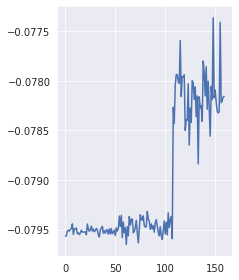

In [127]:
fig = plt.figure()
ax1 = plt.plot(e_vals)
plt.plot(e_vals)
#ax1.title.set_text('eigenvalues')
i = np.where(e_vals < 9.58300136e-01)[0]
ax2 = plt.subplot(122)
plt.plot(e_vecs[:, i[0]])
fig.tight_layout()
plt.show()

In [78]:
e_vals_sorted_indices=np.argsort(e_vals)
e_vals_sorted=e_vals[e_vals_sorted_indices]
e_vals_sorted

array([-6.67774042e-17,  9.58300136e-01,  9.99362156e-01,  9.99538681e-01,
        9.99867080e-01,  9.99886897e-01,  9.99927601e-01,  9.99956091e-01,
        9.99972232e-01,  9.99979344e-01,  9.99986648e-01,  9.99990695e-01,
        9.99995927e-01,  9.99998094e-01,  9.99998294e-01,  9.99998969e-01,
        9.99999252e-01,  9.99999443e-01,  9.99999508e-01,  9.99999636e-01,
        9.99999823e-01,  9.99999867e-01,  9.99999931e-01,  9.99999953e-01,
        9.99999954e-01,  9.99999963e-01,  9.99999969e-01,  9.99999972e-01,
        9.99999978e-01,  9.99999981e-01,  9.99999987e-01,  9.99999989e-01,
        9.99999990e-01,  9.99999991e-01,  9.99999992e-01,  9.99999993e-01,
        9.99999993e-01,  9.99999995e-01,  9.99999995e-01,  9.99999996e-01,
        9.99999996e-01,  9.99999997e-01,  9.99999997e-01,  9.99999997e-01,
        9.99999998e-01,  9.99999998e-01,  9.99999998e-01,  9.99999999e-01,
        9.99999999e-01,  9.99999999e-01,  9.99999999e-01,  9.99999999e-01,
        9.99999999e-01,  

[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian')]

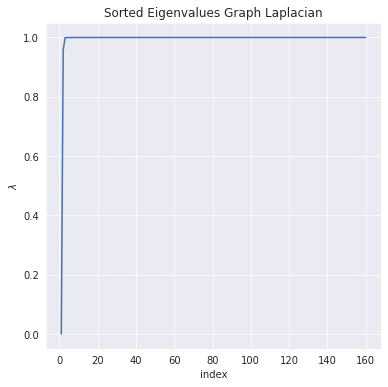

In [149]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(6,6)) 
sns.lineplot(x=range(1, e_vals_sorted_indices.size+1), y=e_vals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$')

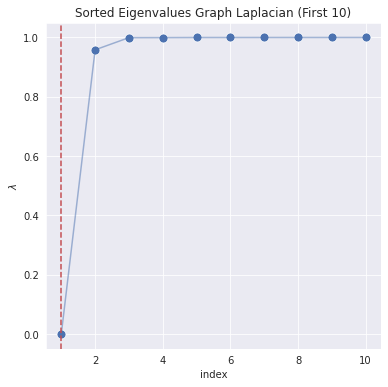

In [150]:
index_lim=10
fig, ax=plt.subplots(figsize=(6,6)) 
sns.scatterplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=1, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [152]:
smallest_e_vals_index=np.argwhere((-6.67774043e-17<(e_vals))&(e_vals<9.99918327e-01))
e_vals[smallest_e_vals_index]
#np.where(e_vals==np.partition)(e_vals,1)[1]) # the second smallest eigenvalue 

array([[-6.67774042e-17],
       [ 9.58300136e-01],
       [ 9.99362156e-01],
       [ 9.99538681e-01],
       [ 9.99867080e-01],
       [ 9.99886897e-01]])

In [158]:
proj_df=pd.DataFrame(e_vecs[:, smallest_e_vals_index.squeeze()])
proj_df.columns=['v_'+str(c+1) for c in proj_df.columns]
proj_df.head()
New=proj_df
proj_df

,v_1,v_2,v_3,v_4,v_5,v_6
0,-0.079567,0.048249,-0.081678,0.059200,0.071028,-0.026562
1,-0.079563,0.048543,-0.082082,0.051019,0.093054,-0.007947
2,-0.079512,0.052820,0.023009,-0.006978,0.168749,-0.023618
3,-0.079508,0.053429,-0.065069,0.023378,-0.059049,-0.041261
4,-0.079516,0.051961,-0.076342,0.066246,0.082626,-0.086853
...,...,...,...,...,...,...
155,-0.077410,-0.136904,-0.041007,0.156918,-0.171343,0.210236
156,-0.078220,-0.112847,0.000915,-0.057359,-0.043172,-0.086177
157,-0.078202,-0.111749,0.108976,0.169555,-0.155576,0.028823
158,-0.078162,-0.115349,-0.042431,0.039566,-0.084865,0.098236


In [159]:
New.to_excel('New.xlsx')

In [154]:
from sklearn.cluster import KMeans
inertias=[]
k_candidates=range(1,6)
for k in k_candidates:
  k_means=KMeans(random_state=42, n_clusters=k)
  k_means.fit(proj_df)
  inertias.append(k_means.inertia_)

[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k'), Text(0.5, 1.0, 'Inertia K-Means')]

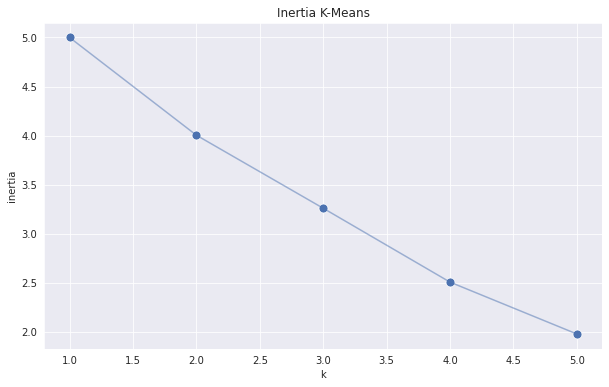

In [155]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x=k_candidates, y=inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y=inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

In [156]:
def run_k_means(do, n_clusters):
  k_means=KMeans(random_state=25, n_clusters=n_clusters)
  k_means.fit(do)
  cluster=k_means.predict(do)
  return cluster

cluster=run_k_means(proj_df, n_clusters=3)  
cluster

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

Text(0.3, 0.92, 'small Eigenvectors Cluster')

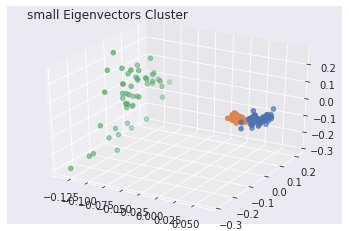

In [146]:
sns.set_style('darkgrid',)
sns.set_palette(palette='deep')
sns_c=sns.color_palette(palette='deep')
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs=proj_df['v_1'], ys=proj_df['v_2'], zs=proj_df['v_3'], c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in cluster]
)
ax.set_title('small Eigenvectors Cluster', x=0.3)

In [87]:
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
count9=0
True_labels=[]
for i in range(53):
  True_labels.append(1)
for i in range(55):
  True_labels.append(0) 
for i in range(52):
  True_labels.append(2)
for i in range(53):
  if True_labels[i]==cluster[i]:count1+=1
  elif True_labels[i]==1:count2+=1
  elif True_labels[i]==2:count3+=1
print(count1)
print(count2)
print(count3)
for i in range(53, 108):
  if True_labels[i]==cluster[i]:count4+=1
  elif True_labels[i]==0:count5+=1
  elif True_labels[i]==2:count6+=1
print(count4)
print(count5)
print(count6)
for i in range(108, 160):
  if True_labels[i]==cluster[i]:count7+=1
  elif True_labels[i]==0:count8+=1
  elif True_labels[i]==1:count9+=1
print(count7)
print(count8)
print(count9)
print('the number of bad images well classified over 53 is equal to', count1)
print('the number of empty images well classified over 55 is equal to', count4)
print('the number of good images well classified over 53 is equal to', count7)
print('the accuracy for bad is equal to', (count1/53)*100 )
print('the accuracy for empty is equal to', (count4/55)*100 )
print('the accuracy for good is equal to', (count7/52)*100 )
print('the total accuracy is given by', (count1+count4+count7)*100/160)

52
1
0
55
0
0
52
0
0
the number of bad images well classified over 53 is equal to 52
the number of empty images well classified over 55 is equal to 55
the number of good images well classified over 53 is equal to 52
the accuracy for bad is equal to 98.11320754716981
the accuracy for empty is equal to 100.0
the accuracy for good is equal to 100.0
the total accuracy is given by 99.375


In [88]:
"""import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.cluster import SpectralClustering\nfrom sklearn.preprocessing import StandardScaler, normalize\nfrom sklearn.decomposition import PCA\nfrom sklearn.metrics import silhouette_score\n'

In [89]:
#clustering=SpectralClustering(n_clusters=3, eigen_solver='arpack', n_components=3, random_state=42, n_init=10, gamma=1, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None).fit(Matrix)

In [90]:
#labels=clustering.labels_
#labels